# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [163]:
# import numpy and pandas
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_1samp
import matplotlib as plt

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

salaries = pd.read_csv(r'C:\Users\Repairmanmanmanman\test\datamia0819\module-2\lab-hypothesis-testing\Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [198]:
# Your code here:
salaries.dtypes
salaries.isnull().sum().tolist()


[0, 0, 0, 0, 0, 25161, 8022, 25161]

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [34]:
# Your code here:
print(salaries['Salary or Hourly'].str.contains('Salary').sum())
print(salaries['Salary or Hourly'].str.contains('Hourly').sum())
salaries[salaries['Salary or Hourly'].str.contains('Hourly')]

25161
8022


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
...,...,...,...,...,...,...,...,...
33164,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10
33168,"ZWARYCZ MANN, IRENE A",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
33169,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60
33174,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
# Your code here:
salaries.groupby(['Department'])['Name'].count()
Department = pd.DataFrame(salaries.groupby(['Department'])['Name'].count())
Department.rename(columns={'Name':'Employees'}, inplace=True)
Department

,Employees
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171
CITY CLERK,84


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

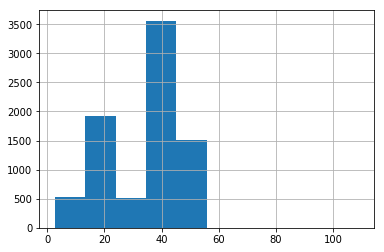

In [143]:
#Information I know.
#Hourly Rate Mean: 32.788/hr
#Hourly Rate std: 12.11
#Null Hypothesis: 30/hr
#IF I want a confidence of 95% then
salaries.describe()

Hourly = pd.DataFrame(salaries[salaries['Salary or Hourly'].str.contains('Hourly')])
Hourly.describe()
Hourly['Hourly Rate'].hist()

In [8]:
# Your code here:
ttest_1samp(Hourly['Hourly Rate'], 30.00)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [9]:
# Your code here:
Salary = pd.DataFrame(salaries[salaries['Salary or Hourly'].str.contains('Salary')])
Salary

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
...,...,...,...,...,...,...,...,...
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
33181,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


Using the `crosstab` function, find the department that has the most hourly workers. 

In [142]:
# Your code here:
WageSlave = pd.crosstab(salaries['Department'], salaries['Salary or Hourly'])

WageSlave.sort_values(by='Hourly', ascending = False)

#It would seem that Streets and Sanitation have the most hourly workers, 1862 total.

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [204]:
# Your code here:
StreetWage = pd.DataFrame(salaries[salaries['Department'] == 'STREETS & SAN'][(salaries['Salary or Hourly'] == 'Hourly')])
StreetWage['Hourly Rate'].describe()

ttest_1samp(StreetWage['Hourly Rate'], 35)

C:\Users\Repairmanmanmanman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564707717e-21)

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [207]:
# Your code here:
from scipy.stats import t
sterror = stats.sem(StreetWage['Hourly Rate'], ddof=1)
t.interval(0.05, StreetWage['Hourly Rate'], loc=StreetWage['Hourly Rate'].mean(), scale=sterror)

(array([33.71998469, 33.71994549, 33.71998469, ..., 33.71998469,
        33.71998568, 33.71994857]),
 array([33.73677149, 33.73681068, 33.73677149, ..., 33.73677149,
        33.73677049, 33.73680761]))

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [208]:
# Your code here:
sterror2 = stats.sem(Salary['Annual Salary'], ddof=1)
t.interval(0.05, Salary['Annual Salary'], loc=Salary['Annual Salary'].mean(), scale=sterror2)

(array([86778.68166774, 86778.68166614, 86778.68166777, ...,
        86778.68166513, 86778.68166596, 86778.68167032]),
 array([86795.31791256, 86795.31791416, 86795.31791253, ...,
        86795.31791517, 86795.31791434, 86795.31790999]))

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [210]:
# Your code here:
from statsmodels.stats.proportion import proportions_ztest


In [231]:
count = WageSlave['Hourly'].sum() #This is to check the amount of hourly employees.
nobs = WageSlave['Salary'].sum()+WageSlave['Hourly'].sum() #This is to check against all employees.
value = 0.25 #This is the percentage of 25 that we are checking against.

proportions_ztest(count, nobs, value)

(-3.5099964213703005, 0.0004481127249057967)